<a href="https://colab.research.google.com/github/TrunnMosby/Time-Series-Forecasting-Using-FBprophet/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
URL='https://query1.finance.yahoo.com/v7/finance/download/GOOG?'


In [ ]:
params = {
    'range': '5y',
    'interval':'1d',
    'events':'history'
}

In [ ]:

import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests

In [ ]:
response = requests.get(URL, params=params)

In [ ]:
import pandas as pd

file = StringIO(response.text)
reader = csv.reader(file)
data = pd.DataFrame(reader)




In [ ]:
data

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2016-02-24,688.919983,700.000000,680.780029,699.559998,699.559998,1963600
2,2016-02-25,700.010010,705.979980,690.585022,705.750000,705.750000,1642200
3,2016-02-26,708.580017,713.429993,700.859985,705.070007,705.070007,2243500
4,2016-02-29,700.320007,710.890015,697.679993,697.770020,697.770020,2481100
...,...,...,...,...,...,...,...
1256,2021-02-18,2110.389893,2132.735107,2103.709961,2117.199951,2117.199951,1121600
1257,2021-02-19,2119.270020,2130.530029,2097.409912,2101.139893,2101.139893,1457400
1258,2021-02-22,2067.000000,2091.419922,2062.139893,2064.879883,2064.879883,1366200
1259,2021-02-23,2025.010010,2082.010010,2002.020020,2070.860107,2070.860107,1666500


In [ ]:
data[4].iloc[1:]

1        699.559998
2        705.750000
3        705.070007
4        697.770020
5        718.809998
           ...     
1256    2117.199951
1257    2101.139893
1258    2064.879883
1259    2070.860107
1260    2056.419922
Name: 4, Length: 1260, dtype: object

In [ ]:
pd.DataFrame({'ds':data[0].iloc[1:],'y':data[4].iloc[1:]})

,ds,y
1,2016-02-24,699.559998
2,2016-02-25,705.750000
3,2016-02-26,705.070007
4,2016-02-29,697.770020
5,2016-03-01,718.809998
...,...,...
1256,2021-02-18,2117.199951
1257,2021-02-19,2101.139893
1258,2021-02-22,2064.879883
1259,2021-02-23,2070.860107


In [ ]:
def Stock_Prediction(URL):
  import pandas as pd
  import numpy as np
  import re
  import json
  import csv
  from io import StringIO
  from bs4 import BeautifulSoup
  import requests
  from fbprophet import Prophet
  params = {
    'range': '5y',
    'interval':'1d',
    'events':'history'
  }
  response = requests.get(URL, params=params)
  file = StringIO(response.text)
  reader = csv.reader(file)
  data = pd.DataFrame(reader)
  train=pd.DataFrame({'ds':data[0].iloc[1:],'y':data[4].iloc[1:]}) 
  train['ds']=pd.to_datetime(train['ds'])
  New_month=[]
  for i in pd.DatetimeIndex(train['ds']).day:
      if(i>5):
        New_month.append(0)
      else:
        New_month.append(1)
  New_year=[]
  for i,j in zip(pd.DatetimeIndex(train['ds']).day,pd.DatetimeIndex(train['ds']).month):
    if(i==31 and j==12):
      New_year.append(1)
      
    elif(i>=1and i<5 and j==1):
      New_year.append(1)

    else:
      New_year.append(0)
  train['New_year']=New_year
  train['New_month']=New_month
  m=Prophet(changepoint_prior_scale=3,holidays_prior_scale=0.001,changepoint_range=1,n_changepoints=150)
  m.add_country_holidays(country_name='IN')
  m.add_regressor('New_year')
  m.add_regressor('New_month')
  m.fit(train)
  future=m.make_future_dataframe(periods=30)
  for i in pd.DatetimeIndex(future['ds'].iloc[len(train):]).day:
        if(i>5):
          New_month.append(0)
        else:
          New_month.append(1)
  for i,j in zip(pd.DatetimeIndex(future['ds'].iloc[len(train):]).day,pd.DatetimeIndex(future['ds'].iloc[len(train):]).month):
      if(i==31 and j==12):
        New_year.append(1)
        
      elif(i>=1and i<5 and j==1):
        New_year.append(1)

      else:
        New_year.append(0)

  df=pd.DataFrame({'ds':future['ds'],'New_year':New_year, 'New_month':New_month })
  forecast=m.predict(df)
  lower=[]
  upper=[]
  for i,j in zip(forecast['yhat_lower'],forecast['yhat']):
        lower.append(j-i)
  for i,j in zip(forecast['yhat_upper'],forecast['yhat']):
        upper.append(i-j)

  avg=[]
  for i,j in zip(lower,upper):
      avg.append((i+j)/2)
   

  error=[]
  for i,j in zip(forecast['yhat'].iloc[len(train):],avg[len(train):]):
        print(i,'+/-',j)
        error.append(j/i)
   
  return m.plot(forecast),pd.DataFrame({'Date':future['ds'].iloc[len(train):],'Close':forecast['yhat'].iloc[len(train):],'Tolerance':avg[len(train):]}),np.array(error).mean(),max(error),min(error)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



2157.540398590544 +/- 33.2443255210444
2163.373941051701 +/- 32.52552366558575
2182.648887264857 +/- 31.323919077171922
2188.635853485403 +/- 32.936640564905474
2176.766936460691 +/- 32.112790356897676
2183.4605528843526 +/- 32.51011881597651
2190.9423524040485 +/- 34.66839206130794
2196.0582851810386 +/- 33.054832947448176
2200.2451146278654 +/- 33.33769646753967
2219.5452601322354 +/- 34.6070691593377
2223.935308631442 +/- 35.47267797255677
2212.2008894257683 +/- 37.26628848261794
2217.4648910942806 +/- 39.969965836310166
2223.6416555002493 +/- 37.33212792648328
2227.6014785612692 +/- 39.3621277549355
2230.8025800403207 +/- 38.630362385754324
2247.6435021177626 +/- 40.99219268677166
2251.439223004032 +/- 41.65177128556502
2239.323821232712 +/- 42.42481357248084
2244.4264951961823 +/- 45.833108856369336
2250.6637084096733 +/- 45.64163497742288
2254.903735171898 +/- 50.71694128494369
2258.598773639635 +/- 50.49280901818133
2276.1375793175184 +/- 48.73520499645679
2280.821896135831 +/- 

(<Figure size 720x432 with 1 Axes>,            Date        Close  Tolerance
 1259 2021-02-25  2157.540399  33.244326
 1260 2021-02-26  2163.373941  32.525524
 1261 2021-02-27  2182.648887  31.323919
 1262 2021-02-28  2188.635853  32.936641
 1263 2021-03-01  2176.766936  32.112790
 1264 2021-03-02  2183.460553  32.510119
 1265 2021-03-03  2190.942352  34.668392
 1266 2021-03-04  2196.058285  33.054833
 1267 2021-03-05  2200.245115  33.337696
 1268 2021-03-06  2219.545260  34.607069
 1269 2021-03-07  2223.935309  35.472678
 1270 2021-03-08  2212.200889  37.266288
 1271 2021-03-09  2217.464891  39.969966
 1272 2021-03-10  2223.641656  37.332128
 1273 2021-03-11  2227.601479  39.362128
 1274 2021-03-12  2230.802580  38.630362
 1275 2021-03-13  2247.643502  40.992193
 1276 2021-03-14  2251.439223  41.651771
 1277 2021-03-15  2239.323821  42.424814
 1278 2021-03-16  2244.426495  45.833109
 1279 2021-03-17  2250.663708  45.641635
 1280 2021-03-18  2254.903735  50.716941
 1281 2021-03-19  2258

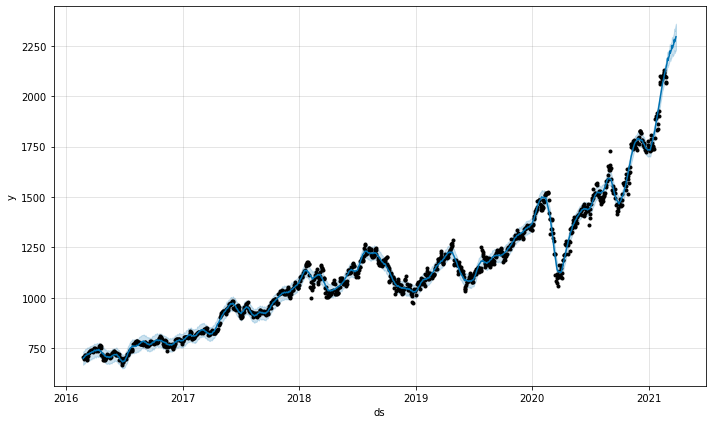

In [ ]:
Stock_Prediction('https://query1.finance.yahoo.com/v7/finance/download/GOOG?')

In [ ]:
import numpy as np

a=[1,2,3]
np.array(a).mean()

2.0